<a href="https://colab.research.google.com/github/ajbd2106/Airport-Baggage/blob/master/Assignment_01_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd # import data analysis module
import io # import input/output module

df = pd.read_csv('content/Car_Price.csv') #reads csv file into a new data frame
df # displays full data frame

,car_ID,wheelbase,carheight,enginesize,stroke,compressionratio,horsepower,car_price
0,1,88.6,48.8,130,2.68,9.0,111,13495.0
1,2,88.6,48.8,130,2.68,9.0,111,16500.0
2,3,94.5,52.4,152,3.47,9.0,154,16500.0
3,4,99.8,54.3,109,3.40,10.0,102,13950.0
4,5,99.4,54.3,136,3.40,8.0,115,17450.0
...,...,...,...,...,...,...,...,...
200,201,109.1,55.5,141,3.15,9.5,114,16845.0
201,202,109.1,55.5,141,3.15,8.7,160,19045.0
202,203,109.1,55.5,173,2.87,8.8,134,21485.0
203,204,109.1,55.5,145,3.40,23.0,106,22470.0


In [10]:
df.head()

,car_ID,wheelbase,carheight,enginesize,stroke,compressionratio,horsepower,car_price
0,1,88.6,48.8,130,2.68,9.0,111,13495.0
1,2,88.6,48.8,130,2.68,9.0,111,16500.0
2,3,94.5,52.4,152,3.47,9.0,154,16500.0
3,4,99.8,54.3,109,3.40,10.0,102,13950.0
4,5,99.4,54.3,136,3.40,8.0,115,17450.0


In [11]:
df.columns # displays labels for all attributes

Index(['car_ID', 'wheelbase', 'carheight', 'enginesize', 'stroke',
       'compressionratio', 'horsepower', 'car_price'],
      dtype='object')

In [12]:
# list the data types for each column
print(df.dtypes)

car_ID                int64
wheelbase           float64
carheight           float64
enginesize            int64
stroke              float64
compressionratio    float64
horsepower            int64
car_price           float64
dtype: object


In [13]:
df.corr()

,car_ID,wheelbase,carheight,enginesize,stroke,compressionratio,horsepower,car_price
car_ID,1.000000,0.129729,0.255960,-0.033930,-0.160824,0.150276,-0.015006,-0.109093
wheelbase,0.129729,1.000000,0.589435,0.569329,0.160959,0.249786,0.353294,0.577816
carheight,0.255960,0.589435,1.000000,0.067149,-0.055307,0.261214,-0.108802,0.119336
enginesize,-0.033930,0.569329,0.067149,1.000000,0.203129,0.028971,0.809769,0.874145
stroke,-0.160824,0.160959,-0.055307,0.203129,1.000000,0.186110,0.080940,0.079443
compressionratio,0.150276,0.249786,0.261214,0.028971,0.186110,1.000000,-0.204326,0.067984
horsepower,-0.015006,0.353294,-0.108802,0.809769,0.080940,-0.204326,1.000000,0.808139
car_price,-0.109093,0.577816,0.119336,0.874145,0.079443,0.067984,0.808139,1.000000


# In order to start understanding the (linear) relationship between an individual variable and the price. We can do this by using "regplot", which plots the scatterplot plus the fitted regression line for the data.

(0.0, 53578.71643744988)

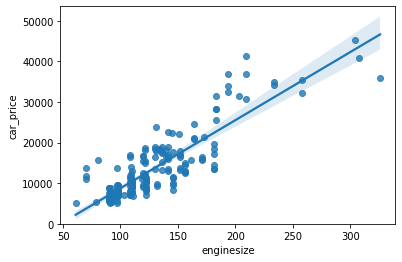

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
# Engine size as potential predictor variable of price
sns.regplot(x="enginesize", y="car_price", data=df)
plt.ylim(0,)

# As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.

In [16]:
df[["enginesize", "car_price"]].corr()

,enginesize,car_price
enginesize,1.000000,0.874145
car_price,0.874145,1.000000


horsepower could be potential predictor variable of price

In [21]:
df[['horsepower', 'car_price']].corr()

,horsepower,car_price
horsepower,1.000000,0.808139
car_price,0.808139,1.000000


# **Weak Linear Relationship**

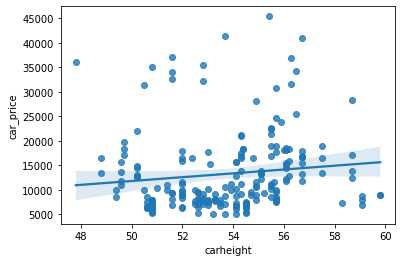

In [26]:
#Let's see if "carheight" as a predictor variable of "price".
sns.regplot(x="carheight", y="car_price", data=df)

# Car height does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it's it is not a reliable variable.

In [28]:
#We can examine the correlation between 'carheight' and 'car_price' and see it's approximately 0.1193
df[['carheight', 'car_price']].corr()

,carheight,car_price
carheight,1.000000,0.119336
car_price,0.119336,1.000000


In [31]:
#Let's calculate the Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'.
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['enginesize'], df['car_price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8741448025245117  with a P-value of P = 1.3547637598648421e-65


Conclusion:
# **Since the p-value is < 0.001, the correlation between enginesize and price is statistically significant, and the linear relationship is quite strong (~0.874).**

# **Horsepower vs Price**
# **Let's calculate the Pearson Correlation Coefficient and P-value of 'horsepower' and 'price'.**

In [32]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['car_price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8081388225362216  with a P-value of P = 1.4834365732941758e-48


In [ ]:
import numpy as np # import numerical module
X=df[['car_ID', 'wheelbase', 'carheight', 'enginesize', 'stroke',
       'compressionratio', 'horsepower' ]] # data frame of independent variables 

y=df['car_price'] # dependent variable

In [ ]:
from scipy import stats # import statistical analysis module
x=df.iloc[:,7] # accesses each cell in final column

print('car_price')
print('mean:',np.mean(x))
print('median:',np.median(x))
print('standard deviation:',x.std())
print('variance:',x.var())


car_price
mean: 13276.710570731706
median: 10295.0
standard deviation: 7988.85233174315
variance: 63821761.57839796


# we can calculate the correlation between variables

# **Lets load the modules for linear regression**

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lm = LinearRegression()
lm

LinearRegression()

# **How could enginesize help us predict car price?**
# ** Using simple linear regression, we will create a linear function with "enginesize" as the predictor variable and the "price" as the response variable.**

In [35]:
X = df[['enginesize']]
Y = df['car_price']

In [36]:
#Fit the linear model using enginesize.
lm.fit(X,Y)

LinearRegression()

In [38]:
#We can output a prediction
Yhat=lm.predict(X)
Yhat[0:7] 

array([13795.34859997, 13795.34859997, 17484.71376062, 10273.68185571,
       14801.53909833, 14801.53909833, 14801.53909833])

In [39]:
#What is the value of the intercept (a)?
lm.intercept_

-8005.445531145204

In [40]:
#What is the value of the Slope (b)?
lm.coef_

array([167.69841639])

# **What is the final estimated linear model we get?**
As we saw above, we should get a final linear model with the structure:

Plugging in the actual values we get:

# price = -8005.4455 - 167.69 x enginesize

# **When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.**



# R-squared
R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

# The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

# Model 1: Simple Linear Regression
Let's calculate the R^2

In [41]:
#enginesize_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.7641291357806176


# We can say that ~ 76.41% of the variation of the price is explained by this simple linear model "enginesize_fit".

# **Decision Making: Determining a Good Model Fit**

Now that we have visualized the models, and generated the R-squared for the fits, how do we determine a good model fit?

What is a good R-squared value?
When comparing models, the model with the higher R-squared value is a better fit for the data.